In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
class multi_armed_bandit:
    def __init__(self, k, bandits):
        self.k = k
        self.bandits = bandits
        self.qn = np.zeros((self.bandits, self.k))
        self.true_rewards =  np.zeros((self.bandits, k))
        self.max_arms = np.argmax(self.true_rewards, 1)
        
    def random_walks(self):
        self.true_rewards += np.random.normal(0,0.01,(self.bandits, self.k))
        self.max_arms = np.argmax(self.true_rewards, 1)
        
    def increment_method(self, i, j, R, alpha):
        self.qn[i][j] += alpha*(R - self.qn[i][j])
        
    def sampled_average(self):
        pass

<IPython.core.display.Javascript object>


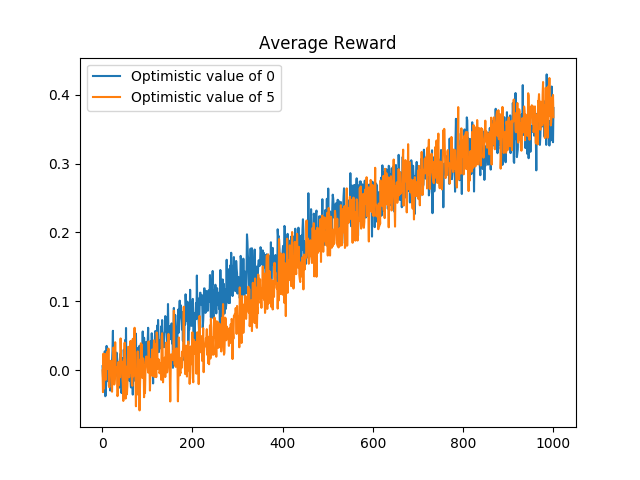

<IPython.core.display.Javascript object>


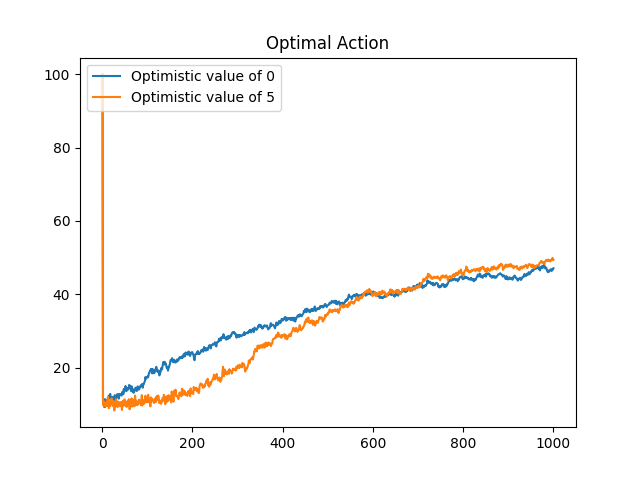

In [3]:
fig1 = plt.figure().add_subplot(111)
fig2 = plt.figure().add_subplot(111)

for optimism in [0,5]:
    nonstationary_rewards = []
    nonstationary_opt_pulls = []
    nonstationary_testbed = multi_armed_bandit(10,2000)
    nonstationary_testbed.qn += optimism

    epsilon = 0

    for i in range(1,1001,1):
        nonstationary_opt_pull = 0
        nonstationary_temp_rewards = []
        for j in range(nonstationary_testbed.bandits):

            #non stationary
            if(random.random() < epsilon):
                p = np.random.randint(nonstationary_testbed.k)
            else:
                p = np.argmax(nonstationary_testbed.qn[j])

            if(p == nonstationary_testbed.max_arms[j]):
                nonstationary_opt_pull+=1

            curr_reward = np.random.normal(nonstationary_testbed.true_rewards[j][p], 1)
            nonstationary_temp_rewards.append(curr_reward)

            nonstationary_testbed.increment_method(j, p, curr_reward, 0.1)

        nonstationary_testbed.random_walks()

        avg_reward = np.mean(nonstationary_temp_rewards)
        nonstationary_rewards.append(avg_reward)
        nonstationary_opt_pulls.append(float(nonstationary_opt_pull)/20)

    fig1.plot(range(1,1001,1), nonstationary_rewards, label='Optimistic value of ' + str(optimism))
    fig2.plot(range(1,1001,1), nonstationary_opt_pulls, label='Optimistic value of ' + str(optimism))

fig1.title.set_text('Average Reward')
fig2.title.set_text('Optimal Action')

fig1.legend(loc='upper left')
fig2.legend(loc='upper right')

<IPython.core.display.Javascript object>


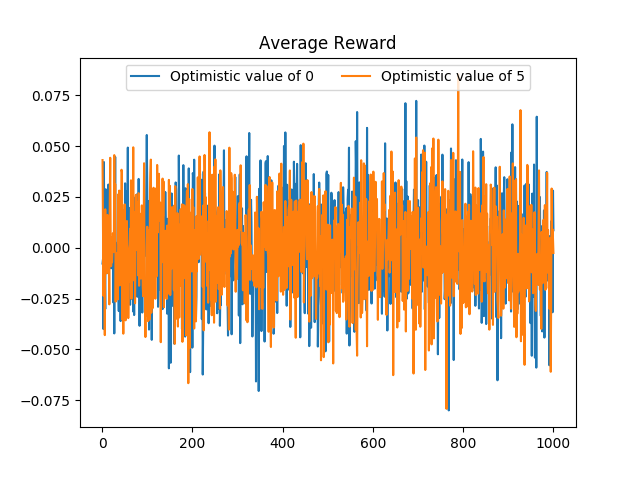

<IPython.core.display.Javascript object>


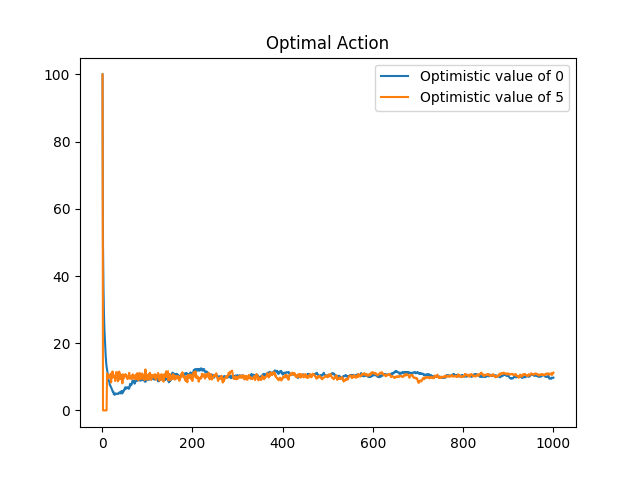

In [5]:
fig1 = plt.figure().add_subplot(111)
fig2 = plt.figure().add_subplot(111)

for optimism in [0,5]:

    stationary_testbed = multi_armed_bandit(10,2000)
    stationary_rewards = []
    stationary_opt_pulls = []
    stationary_testbed.qn += optimism

    epsilon = 0

    for i in range(1,1001,1):
        stationary_opt_pull = 0
        stationary_temp_rewards = []
        
        for j in range(stationary_testbed.bandits):
            
            #stationary
            if(random.random() < epsilon):
                p = np.random.randint(stationary_testbed.k)
            else:
                p = np.argmax(stationary_testbed.qn[j])

            if(p == stationary_testbed.max_arms[j]):
                stationary_opt_pull+=1

            curr_reward = np.random.normal(stationary_testbed.true_rewards[j][p], 1)
            stationary_temp_rewards.append(curr_reward)

            stationary_testbed.increment_method(j, p, curr_reward, 0.1)

        avg_reward = np.mean(stationary_temp_rewards)
        stationary_rewards.append(avg_reward)
        stationary_opt_pulls.append(float(stationary_opt_pull)/20)

    fig1.plot(range(1,1001,1), stationary_rewards, label='Optimistic value of ' + str(optimism))
    fig2.plot(range(1,1001,1), stationary_opt_pulls, label='Optimistic value of ' + str(optimism))

fig1.title.set_text('Average Reward')
fig2.title.set_text('Optimal Action')

fig1.legend(loc='upper center', ncol=2)
fig2.legend(loc='upper right')